In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [3]:
url = 'https://raw.githubusercontent.com/pdeitel/IntroToPython/master/examples/ch10/ave_hi_nyc_jan_1895-2018.csv'
df = pd.read_csv(url)
df.head(10)

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0
5,190001,37.4,0.0
6,190101,37.0,-0.4
7,190201,35.0,-2.4
8,190301,35.5,-1.9
9,190401,29.8,-7.6


In [4]:
df.columns

Index(['Date', 'Value', 'Anomaly'], dtype='object')

In [9]:
df['Date'] = df.Date.floordiv(100)

In [10]:
df.head(20)

,Date,Value,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0
5,1900,37.4,0.0
6,1901,37.0,-0.4
7,1902,35.0,-2.4
8,1903,35.5,-1.9
9,1904,29.8,-7.6


# Modelo

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(df.Date.values.reshape(-1, 1), 
                                                    df.Value.values, random_state=11)

In [25]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

In [26]:
linear_regression.fit(X=X_train, y=Y_train)

LinearRegression()

In [27]:
linear_regression.coef_

array([0.01939167])

In [28]:
linear_regression.intercept_

-0.30779820252656975

In [30]:
predicted = linear_regression.predict(X_test)

array([37.85501484, 36.47820604, 37.93258153, 36.61394775, 36.74968946,
       38.68885679, 36.43942269, 37.13752293, 37.62231476, 37.5253564 ,
       37.00178122, 38.320415  , 37.19569795, 38.45615671, 36.55577273,
       37.25387297, 38.18467329, 37.89379819, 38.14588994, 38.63068177,
       38.04893157, 37.02117289, 37.11813126, 37.69988146, 36.73029779,
       37.64170644, 37.56413974, 38.10710659, 36.8660395 , 36.84664783,
       36.9436062 ])

In [31]:
expected = Y_test

In [60]:
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


In [42]:
predicted

array([37.85501484, 36.47820604, 37.93258153, 36.61394775, 36.74968946,
       38.68885679, 36.43942269, 37.13752293, 37.62231476, 37.5253564 ,
       37.00178122, 38.320415  , 37.19569795, 38.45615671, 36.55577273,
       37.25387297, 38.18467329, 37.89379819, 38.14588994, 38.63068177,
       38.04893157, 37.02117289, 37.11813126, 37.69988146, 36.73029779,
       37.64170644, 37.56413974, 38.10710659, 36.8660395 , 36.84664783,
       36.9436062 ])

In [61]:
import seaborn as sns

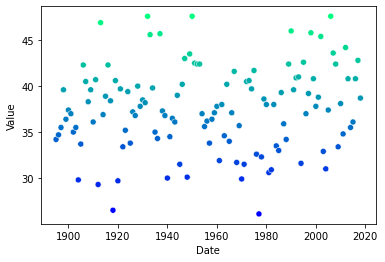

In [65]:
axes = sns.scatterplot(data=df, x='Date', y='Value',
                       hue='Value', palette='winter', legend=False)

In [66]:
axes.set_ylim(10, 70)

(10.0, 70.0)

In [77]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

In [78]:
x = np.array([min(df.Date.values), max(df.Date.values)])
y = predict(x)

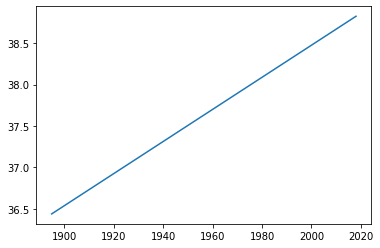

In [79]:
import matplotlib.pyplot as plt
line = plt.plot(x, y)